#**Genetic Algorithm**
Disusun oleh:
  - Dito Adistya Wirawan
  - Luthfillah Akhtar Fakhrudin
  - Nurfaidzi Ramdhani Arifin

DS-46-03

Implementasi Genetic Algorithm (GA)
Temukan nilai x dan y untuk mendapatkan nilai minimum fungsi:

$$f(x_1,x_2) = -(\sin(x_1)\cos(x_2) + \frac{4}{5} \exp(1-\sqrt{x_1^2 + x_2^2})$$

diketahui domain x dan y:

$$-10 ≤ x_1 ≤ 10\ dan\  -10 ≤ x_2 ≤ 10$$

# Program


Import Modul

In [ ]:
# Import modul
import numpy as np
import random
from array import *
import operator
import math
from datetime import datetime
import matplotlib.pyplot as plt
import time

Inisialisasi

In [ ]:
Pm = 0.1 # Probability of mutation
Pc = 0.6 # Probability of cross over
A = 0.000000001  # epsilon
population_size = 100
panjang_kromosom = 20

def heuristic(x, y):
    fitness=0
    firstTerm= (math.sin(x)*math.cos(y))
    secondTerm= (4/5) * math.exp(1-math.sqrt(x**2 + y**2))
    fitness= -(firstTerm+secondTerm)
    return fitness

Inisialisasi Populasi

In [ ]:
def inisialisasiPopulasi(population_size):
    population = []
    for _ in range(population_size):
        kromosom_x = bin(random.randint(0, (2**(panjang_kromosom//2))-1))[2:].zfill(panjang_kromosom//2)
        kromosom_y = bin(random.randint(0, (2**(panjang_kromosom//2))-1))[2:].zfill(panjang_kromosom//2)
        population.append((kromosom_x, kromosom_y))
    return population

Dekode Kromosom

In [ ]:

def decode(kromosom):
    kromosom_x, kromosom_y = kromosom
    kromosom_x = int(kromosom_x, 2)
    kromosom_y = int(kromosom_y, 2)
    x = -10 + ((kromosom_x-0) / ((2**(panjang_kromosom//2))-0))*(10-(-10))
    y = -10 + ((kromosom_y-0) / ((2**(panjang_kromosom//2))-0))*(10-(-10))

    return x, y


Menghitung Nilai Fitness

In [ ]:
def fitness(kromosom, a=A):
    return heuristic(decode(kromosom)[0], decode(kromosom)[1])+a


Mutasi

In [ ]:
def mutasi(kromosom, prob=Pm):
    mutated_kromosom = ""
    for bit in kromosom:
        if random.random() < prob:
            if bit == "0":
                mutated_kromosom += "1"
            else:
                mutated_kromosom += "0"
        else:
            mutated_kromosom += bit

    return mutated_kromosom

Crossover

In [ ]:

def crossover(kromosom1, kromosom2, prob=Pc):
    x = random.random()
    if x < prob:
        titik_potong = random.randint(1, panjang_kromosom - 1) # Memilih titik potong
        k1 = kromosom1[0] + kromosom1[1]
        k2 = kromosom2[0] + kromosom2[1]
        kromo3 = k1[:titik_potong] + k2[titik_potong:]
        kromo4 = k2[:titik_potong] + k1[titik_potong:]
        kromosom3 = (kromo3[:len(kromo3)//2],kromo3[len(kromo3)//2:])
        kromosom4 = (kromo4[:len(kromo4)//2],kromo4[len(kromo4)//2:])
    else:
        kromosom3 = kromosom1
        kromosom4 = kromosom2
    return (kromosom3, kromosom4)


Pemilihan orangtua menggunakan metode tournament

In [ ]:
#Pemilihan orangtua menggunakan metode tournament
def get_tournament5(gen, tournament_size):
    tournament = []
    for _ in range(len(gen)):
        tournament_candidates = random.sample(gen, tournament_size)
        tournament_fitness = [fitness(kromosom) for kromosom in tournament_candidates]
        winner = tournament_candidates[np.argmin(tournament_fitness)]
        tournament.append(winner)
    return tournament

Menghasilkan Generasi Selanjutnya

In [ ]:

def next_generation(gen, tournament_size):
    tournament = get_tournament5(gen, tournament_size)
    next_gen = []
    for i in range(0, len(gen), 2):
        (anak1_1, anak1_2), (anak2_1, anak2_2) = crossover(tournament[i], tournament[i+1])
        next_gen.append((mutasi(anak1_1), mutasi(anak1_2)))
        next_gen.append((mutasi(anak2_1), mutasi(anak2_2)))
    result = []
    gen.sort(key=lambda x: fitness(x), reverse=True)
    result = gen[:2]+next_gen[2:len(gen)]

    return result


In [ ]:
def print_generasi(generasi):
    for i in range(len(generasi)):
        x, y = decode(generasi[i])
        fit = fitness(generasi[i])
        print("\"{}\" ({:.5f}, {:.5f}) : {}".format(generasi[i], x, y, fit))

Mencari Kromosom Terbaik

In [ ]:
def best_kromosom(generasi):
    best_kromosom = generasi[0]
    best_fitness = fitness(best_kromosom)

    for kromosom in generasi:
        kromosom_fitness = fitness(kromosom)
        if kromosom_fitness < best_fitness:
            best_kromosom = kromosom
            best_fitness = kromosom_fitness

    return best_kromosom

Hasil Akhir

In [ ]:
generasi = inisialisasiPopulasi(population_size)
tournament_size = 5

best = best_kromosom(generasi)
best_fitness = fitness(best)
IterFound = 0  # Initialize the iteration at which the best kromosom was found

list_y = []
best_y = []
termination = 2000
i = 0
while termination > 0:
    generasi = next_generation(generasi, tournament_size)
    #print("Generasi {}".format(IterFound))
    #print_generasi(generasi)

    new_best = best_kromosom(generasi)
    new_best_fitness = fitness(new_best)  # Calculate the fitness of the new best kromosom
    list_y.append(new_best_fitness)
    if new_best_fitness < best_fitness:
        best_fitness = new_best_fitness
        best = new_best
        IterFound = i
        print("New best, iterasi ke-{}: kromosom: {} fitness: {}".format(IterFound, best, best_fitness))
        best_y.append(best_fitness)

    i += 1
    termination -= 1

print("=============================================================")
print("Hasil Akhir")
print("Berhenti di generasi ke {}".format(i))
print("Kromosom terbaik: {}".format(best))
x, y = decode(best)
print("Nilai x: {:.5f}".format(x))
print("Nilai y: {:.5f}".format(y))
print("Nilai kromosom terbaik: {}".format(best_fitness))
print()

New best, iterasi ke-0: kromosom: ('1000111011', '1000000100') fitness: -1.5960714588012552
New best, iterasi ke-2: kromosom: ('1000000000', '1000000011') fitness: -2.0508671386938846
New best, iterasi ke-3: kromosom: ('1000000000', '1000000010') fitness: -2.0913168685551
New best, iterasi ke-5: kromosom: ('1000000001', '1000000010') fitness: -2.101211733277271
New best, iterasi ke-7: kromosom: ('1000000001', '1000000000') fitness: -2.1520944061118286
New best, iterasi ke-9: kromosom: ('1000000000', '1000000000') fitness: -2.1746254617672363
Hasil Akhir
Berhenti di generasi ke 2000
Kromosom terbaik: ('1000000000', '1000000000')
Nilai x: 0.00000
Nilai y: 0.00000
Nilai kromosom terbaik: -2.1746254617672363



In [ ]:
len(list_y)
list_x = [i for i in range(0,len(list_y))]
print(len(list_x))
best_x = [i for i in range(0,len(best_y))]

2000


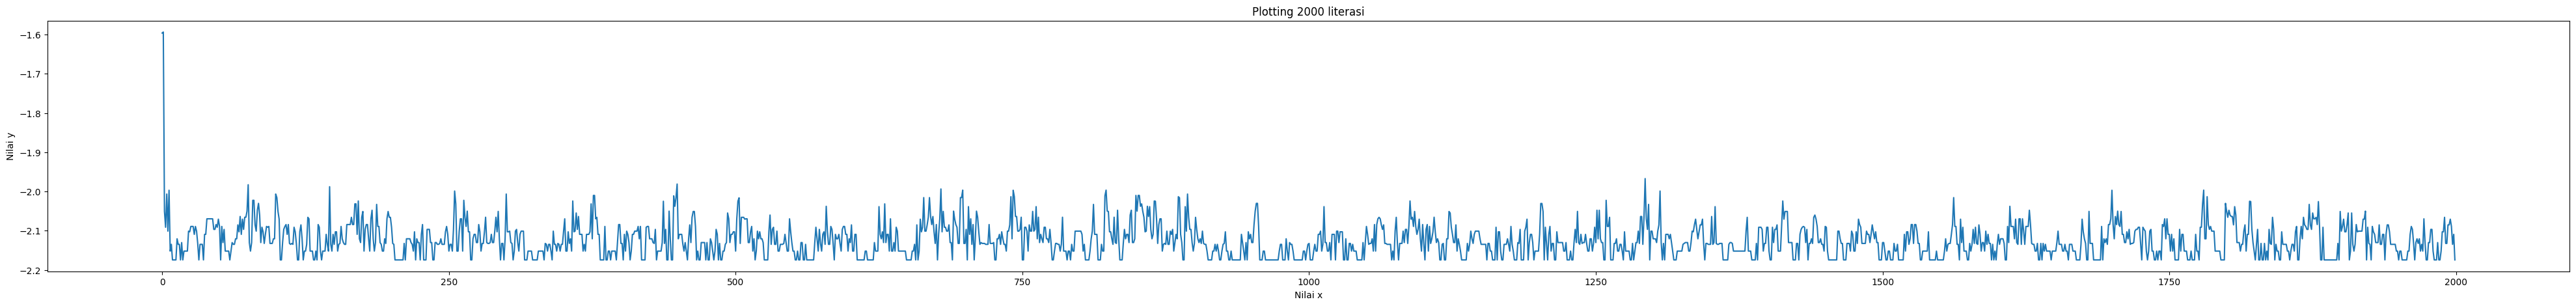

In [ ]:
plt.figure(figsize=(50, 5))
plt.plot(list_x, list_y)
plt.xlabel('Nilai x')
plt.ylabel('Nilai y')
plt.title("Plotting 2000 literasi")
plt.show()

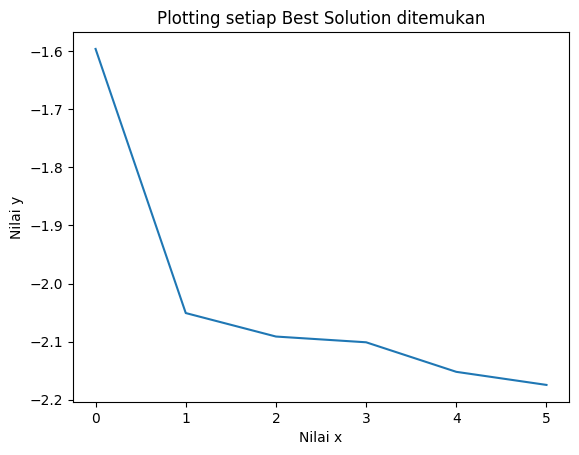

In [ ]:

plt.plot(best_x, best_y)
plt.xlabel('Nilai x')
plt.ylabel('Nilai y')
plt.title('Plotting setiap Best Solution ditemukan')
plt.show()